# Deep Learning Analysis on Life Expectancy Data

## Importing libraries and packages

In [3]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Scikit-learn, Pandas, and NumPy, Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

/Users/ishiigos/DS_ML_Projects/Life Expectancy analysis/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Loading the Dataset

In [4]:
df = pd.read_csv("df_analysis.csv")

# Drop non-numeric/categorical string columns
df = df.drop(columns=["Country"])  # Drop the string column

# Optional: Encode Status column if still there
if "Status" in df.columns:
    df["Status"] = df["Status"].map({"Developed": 1, "Developing": 0})

# Define target and features
target_column = "Life_expectancy"
X = df.select_dtypes(include='number').drop(columns=target_column)
y = df[target_column]

### Splitting and scaling the data

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building the model

In [6]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100


/Users/ishiigos/DS_ML_Projects/Life Expectancy analysis/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4775.6494 - mean_absolute_error: 68.6308 - val_loss: 4280.1743 - val_mean_absolute_error: 64.8054
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3896.2783 - mean_absolute_error: 61.5489 - val_loss: 2950.8645 - val_mean_absolute_error: 52.9255
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2350.8350 - mean_absolute_error: 46.0617 - val_loss: 1226.3672 - val_mean_absolute_error: 32.7474
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 877.3369 - mean_absolute_error: 26.3948 - val_loss: 353.4402 - val_mean_absolute_error: 15.9748
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 351.1189 - mean_absolute_error: 15.3492 - val_loss: 203.8411 - val_mean_absolute_error: 11.6080
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 210.9095 - mean_absolute_error: 11.7223 - val_loss: 175.9812 - val_mean_absolute_error: 10.6062
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 185.3799 - mean_a

## Model Evaluation

In [8]:
dl_preds = model.predict(X_test_scaled).flatten()

print(f"R² Score: {r2_score(y_test, dl_preds):.3f}")
print(f"MAE: {mean_absolute_error(y_test, dl_preds):.3f}")
mse = mean_squared_error(y_test, dl_preds)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² Score: 0.732
MAE: 2.994
RMSE: 3.993


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,029 (129.02 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,020 (86.02 KB)

| **Model** | **R²** | **MAE** | **RMSE** |
|-----------------|-----------|---------|---------|
| RandomForest (ML) | 0.944   | 1.167 | 1.825 |
| DeepNeuralNetwork (ML) | 0.732 | 2.994 | 3.993 |
 
###  Model Comparison: Conclusion

-  **Random Forest** performs **better than the Deep Neural Network (DNN)** on all evaluation metrics.
-  It explains more of the variance (R² = 0.944 vs. 0.732).
-  It makes more accurate predictions with lower average error (MAE) and smaller typical error (RMSE).
-  **Random Forest is the better model** for predicting life expectancy on this dataset.

>  The DNN might improve with more tuning or data, but for now, Random Forest gives the best results.

## Save the Model and Scaler

In [22]:
# Save the Model
model.save("Models/life_expectancy_dl_model.h5")

# Save the scaler
import joblib
joblib.dump(scaler, "Models/life_expectancy_scaler.pkl")

['Models/life_expectancy_scaler.pkl']

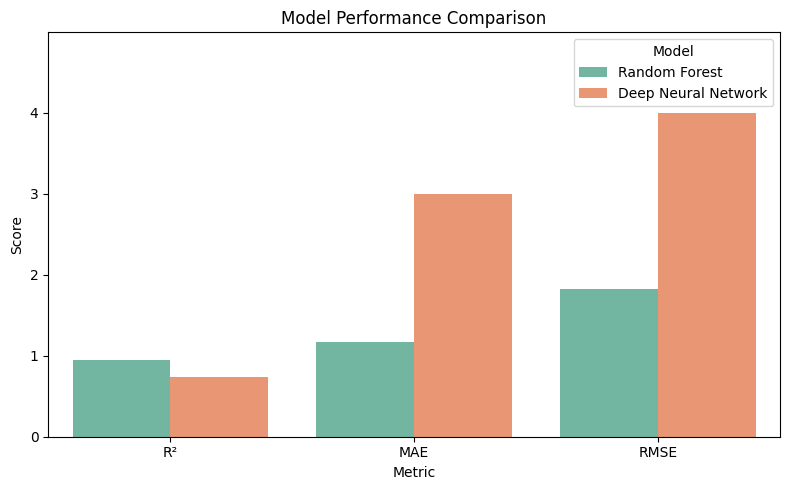

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Metrics for both models
results = pd.DataFrame({
    'Model': ['Random Forest', 'Deep Neural Network'],
    'R²': [0.944, 0.732],
    'MAE': [1.167, 2.994],
    'RMSE': [1.825, 3.993]
})

# Melt for seaborn
melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='Metric', y='Score', hue='Model', palette='Set2')
plt.title('Model Performance Comparison')
plt.ylim(0, max(melted['Score']) + 1)
plt.tight_layout()
plt.show()

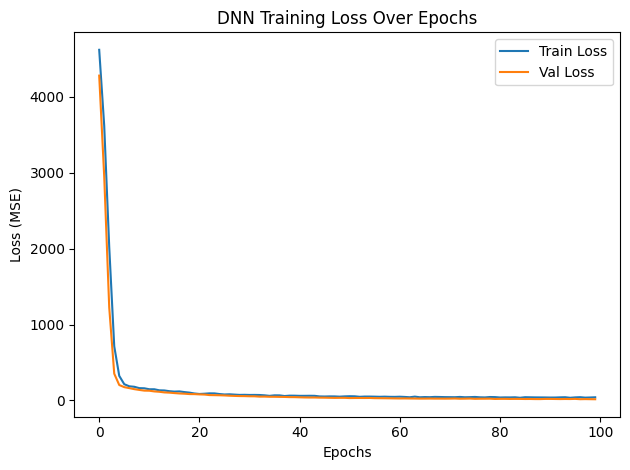

In [18]:
# Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DNN Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.tight_layout()
plt.show()

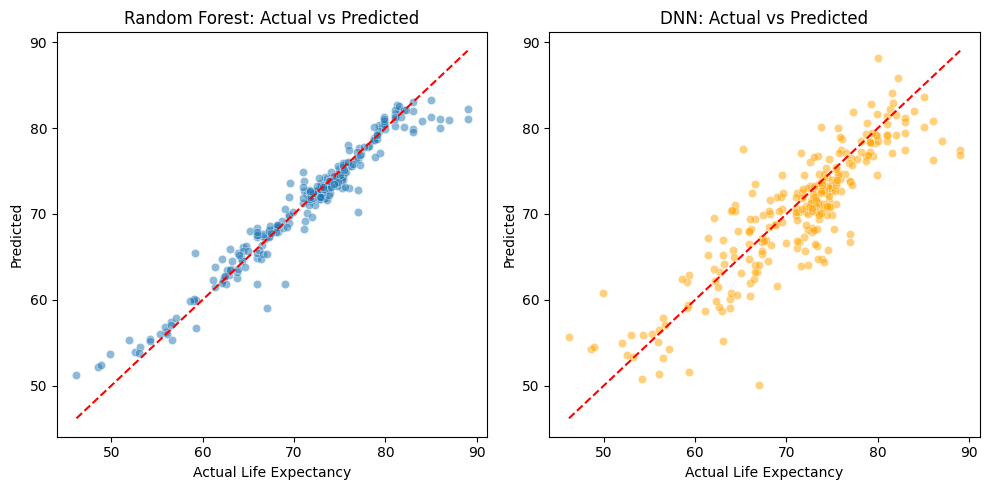

In [21]:
rf_preds = np.load("Models/rf_preds.npy")

# For Random Forest and Deep Learning predictions
plt.figure(figsize=(10, 5))

# Plot 1: Random Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted')

# Plot 2: Deep Neural Network
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=dl_preds, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('DNN: Actual vs Predicted')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

### Model Comparison: Actual vs Predicted Plots

#### 1. Random Forest (Left Plot)
- **Tight clustering** along the red dashed line (`y = x`) shows:
  - High prediction accuracy.
  - Low variance in prediction errors.
- Visually supports the strong metrics:
  - **R² = 0.944**
  - **MAE = 1.167**
  - **RMSE = 1.825**
- Captures both **low and high** life expectancy values accurately.

**Conclusion:** The Random Forest model is highly reliable and consistently accurate.

---

#### 2. Deep Neural Network (Right Plot)
- **More scattered points** around the red line:
  - Some clear under- and over-prediction.
  - Greater prediction error spread.
- Matches earlier metrics:
  - **R² = 0.732**
  - **MAE = 2.994**
  - **RMSE = 3.993**

**Conclusion:** The Deep Neural Network model has moderate accuracy and may benefit from:
  - Better hyperparameter tuning (layers, dropout, learning rate).
  - Additional training data.
  - Feature engineering or normalization adjustments.

---

### Overall Takeaway

| **Model**          | **Fit to Data**           | **Visual Spread** | **Interpretation**                          |
|--------------------|----------------------------|--------------------|----------------------------------------------|
| **Random Forest**  | Very close to ideal line   | Low                | Best-performing model in your comparison     |
| **Deep Neural Net**| Looser fit to ideal line   | Moderate            | Needs improvement or more data to generalize |
